![image info](https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/images/banner_1.png)

# Proyecto 1 - Predicción de precios de vehículos usados

En este proyecto podrán poner en práctica sus conocimientos sobre modelos predictivos basados en árboles y ensambles, y sobre la disponibilización de modelos. Para su desasrrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 1: Predicción de precios de vehículos usados".

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 4. Sin embargo, es importante que avancen en la semana 3 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 4, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/t/b8be43cf89c540bfaf3831f2c8506614).

## Datos para la predicción de precios de vehículos usados

En este proyecto se usará el conjunto de datos de Car Listings de Kaggle, donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como: año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

## Ejemplo predicción conjunto de test para envío a Kaggle

En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

## Rúbrica de Calificación

La calificación estará distribuida de la siguiente manera: 

**Competencia (20 puntos)**

Para cada grupo la calificación será proporcional al lugar que ocupe en el ranking de la competencia. Los grupos que ocupen los primeros 5 puestos obtendrán 20 puntos, a los siguientes 5 grupos se le restarán 2 puntos y así sucesivamente. Es decir: posiciones del 1 al 5 obtendrán 20 puntos, posiciones del 6 al 10 obtendrán 18 puntos, posiciones del 11 a 15 obtendrán 16 puntos y así sucesivamente.

**Informe (80 puntos)**

La calificación del informe se realizará con base en los siguientes criterios (recuerden que deben dar cuenta de cada uno de los aspectos mencionados en los criterios por medio de pantallazos o fracciones de código):

<ins>Preprocesamiento de datos (10 puntos)</ins>

* Los datos de entrenamiento se dividen en datos de entrenamiento y validación. Si decidieron preprocesar los datos (estandarizar, normalizar, imputar valores, etc), estos son correctamente preprocesados al ajustar sobre los datos de entrenamiento (.fit_transform()) y al transformar los datos del set de validación (.transform()). (10 puntos)

<ins>Calibración del modelo (15 puntos)</ins>

* Se calibran los parámetros que se consideren pertinentes del modelo de clasificación seleccionado. (5 puntos)

* Se justifica el método seleccionado de calibración. (5 puntos)

* Se analizan los valores calibrados de cada parámetro y se explica cómo afectan el modelo. (5 puntos)

<ins>Entrenamiento del modelo (15 puntos)</ins>

* Se entrena el modelo de regresión escogido con los datos del set de entrenamiento preprocesados y los parámetros óptimos. (5 puntos)

* Se presenta el desempeño del modelo en los datos de validación con al menos una métrica de desempeño. (5 puntos)

* Se justifica la selección del modelo correctamente. (5 puntos)

<ins>Disponibilización del modelo (30 puntos)</ins>

* Se disponibiliza el modelo en una API alojada en un servicio en la nube. (20 puntos)

* Se hacen las predicciones sobre el valor del automóvil en al menos dos observaciones del set de validación. (10 puntos)

<ins>Conclusiones (10 puntos)</ins>

* Se presentan conclusiones claras y concisas sobre el desarrollo y los resultados del proyecto. (10 puntos)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

# import all what you need for machine learning
import sklearn
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedKFold
import xgboost
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn import ensemble
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn import neighbors

from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import StackingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
import multiprocessing
import math
from statistics import mean
import joblib
import os
os.chdir('..')

# Global settings
n_jobs = -1 # This parameter conrols the parallel processing. -1 means using all processors.
random_state = 42 # This parameter controls the randomness of the data. Using some int value to get same results everytime this code is run.

In [3]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('C:/Users/ElkinDavidPeñaRuiz/OneDrive - CARBOMAX DE COLOMBIA S.A.S/PERSONALES/MIAD/CICLO 4/Machine Learning y PLN/MIAD_UNIANDES/Data/dataTrain_carListings.csv')
dataTesting = pd.read_csv('C:/Users/ElkinDavidPeñaRuiz/OneDrive - CARBOMAX DE COLOMBIA S.A.S/PERSONALES/MIAD/CICLO 4/Machine Learning y PLN/MIAD_UNIANDES/Data/dataTest_carListings.csv', index_col=0)
data = dataTraining
test = dataTesting

## Análisis Exploratorio de Datos

In [4]:
# Visualización datos de entrenamiento
data.head()

,Price,Year,Mileage,State,Make,Model
0,34995,2017,9913,FL,Jeep,Wrangler
1,37895,2015,20578,OH,Chevrolet,Tahoe4WD
2,18430,2012,83716,TX,BMW,X5AWD
3,24681,2014,28729,OH,Cadillac,SRXLuxury
4,26998,2013,64032,CO,Jeep,Wrangler


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    400000 non-null  int64 
 1   Year     400000 non-null  int64 
 2   Mileage  400000 non-null  int64 
 3   State    400000 non-null  object
 4   Make     400000 non-null  object
 5   Model    400000 non-null  object
dtypes: int64(3), object(3)
memory usage: 18.3+ MB


In [6]:
categorical_cols=data.select_dtypes(include=['object']).columns
categorical_cols

Index(['State', 'Make', 'Model'], dtype='object')

In [7]:
numerical_cols=data.select_dtypes(exclude=['object']).columns
numerical_cols

Index(['Price', 'Year', 'Mileage'], dtype='object')

In [8]:
data.describe()

,Price,Year,Mileage
count,400000.000000,400000.000000,4.000000e+05
mean,21146.919312,2013.198125,5.507296e+04
std,10753.664940,3.292326,4.088102e+04
min,5001.000000,1997.000000,5.000000e+00
25%,13499.000000,2012.000000,2.584100e+04
50%,18450.000000,2014.000000,4.295500e+04
75%,26999.000000,2016.000000,7.743300e+04
max,79999.000000,2018.000000,2.457832e+06


In [9]:
df=pd.DataFrame(data['Make'].value_counts()).reset_index().rename(columns={'index':'make','Make': 'count'})

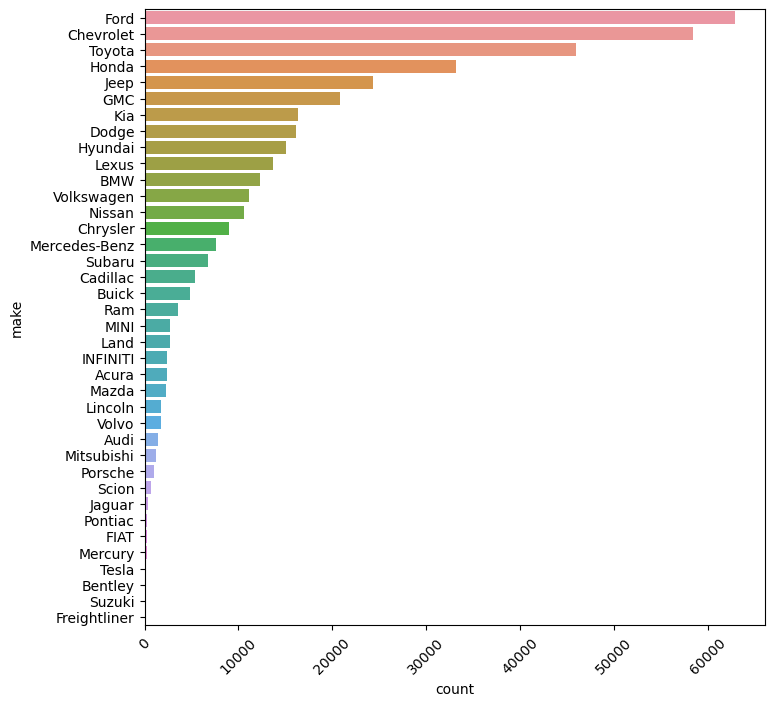

In [10]:
# Cantidad de carros por marca
plt.figure(figsize=(8,8))
plot = sns.barplot(y='make',x='count',data=df)
plot=plt.setp(plot.get_xticklabels(), rotation=45)



In [11]:
df2=pd.DataFrame(data['State'].value_counts()).reset_index().rename(columns={'index':'state','State': 'count'})

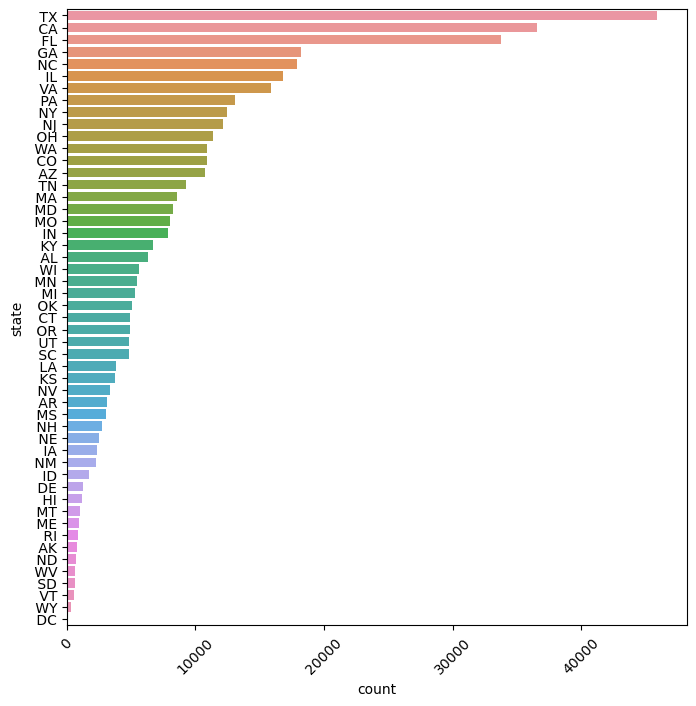

In [12]:
# Cantidad de carros por state
plt.figure(figsize=(8,8))
plot = sns.barplot(y='state',x='count',data=df2)
plot=plt.setp(plot.get_xticklabels(), rotation=45)

<AxesSubplot:xlabel='Price', ylabel='Density'>

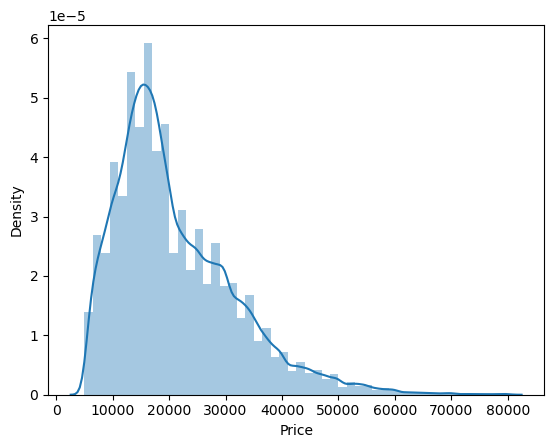

In [13]:
# Distribución del Precio de los carros
sns.distplot(data['Price'],kde=True)

In [14]:
# Codificación de las variables categoricas
cat = ['State','Make','Model']
dic = {'State':{},'Make':{},'Model':{}}

for i in cat:
    idx, codex = pd.factorize(data[i])
    data[i] = idx
    # Diccionario de referencia
    dic[i].update({code: i for i, code in enumerate(codex)})
    # Codificación de variables en testing con base en el diccionario
    test[i] = test[i].apply(lambda code: dic[i][code])

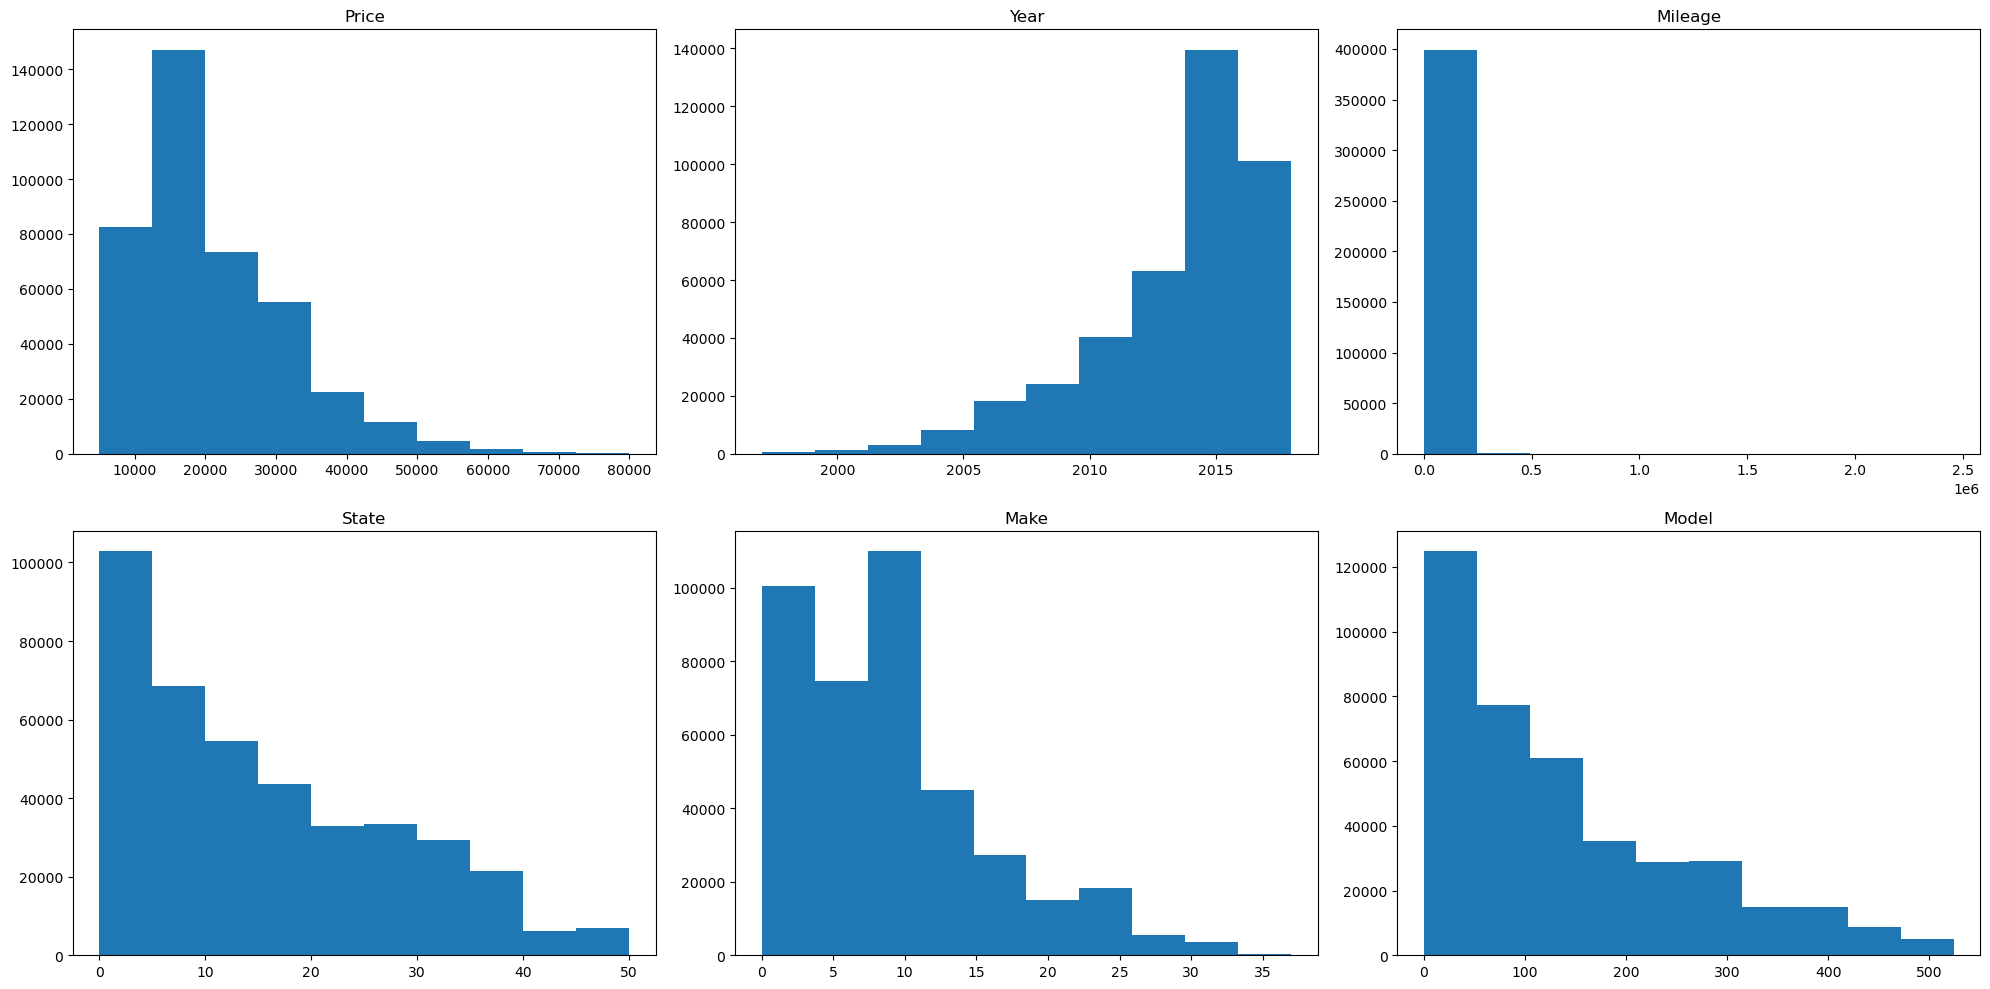

In [15]:
# df = data[['Price','Mileage','Year']]
df = data
filas = math.ceil(len(df.columns) / 3)
fig, a = plt.subplots(filas,3,figsize=(20, 10))

a = a.ravel()
titles = df.columns

for i, ax in enumerate(a):
    
    if i < len(df.columns):
        ax.hist(df.iloc[:,i])
        ax.set_title(titles[i])
plt.tight_layout()

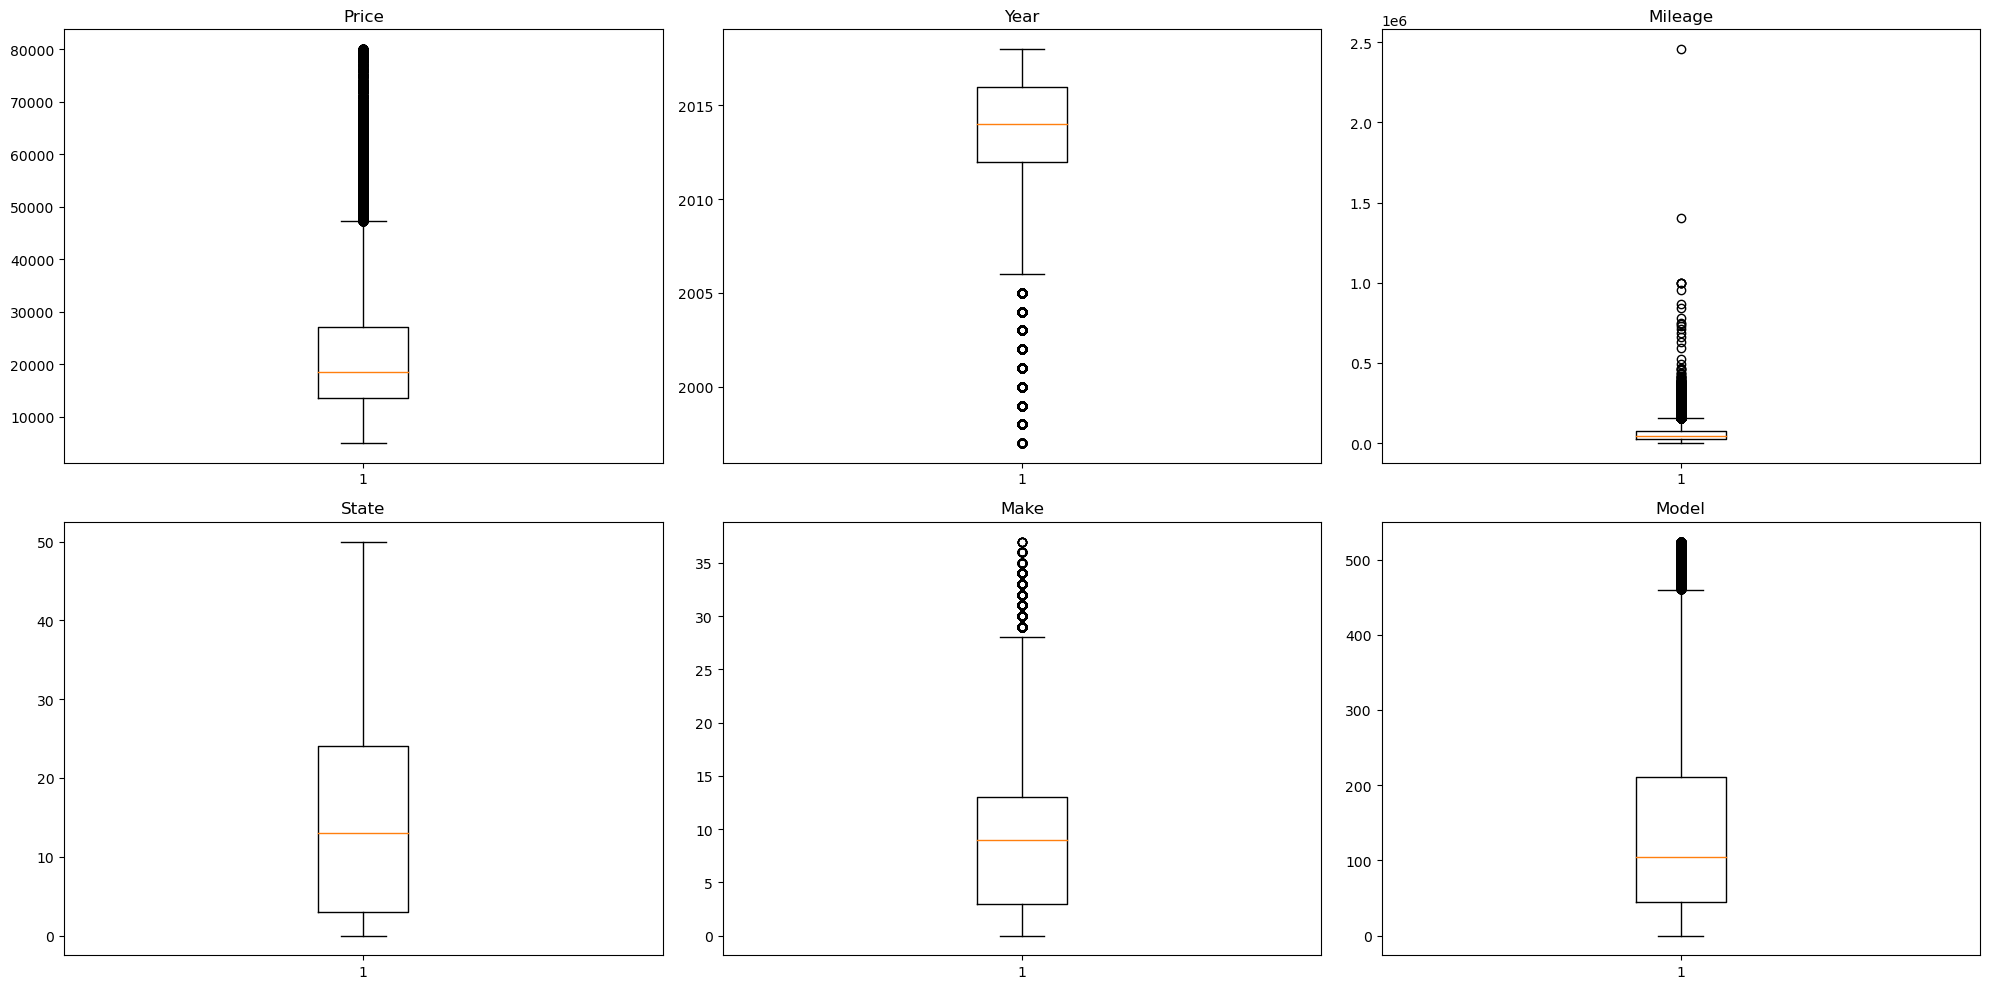

In [16]:
# df = data[['Price','Mileage','Year']]
df = data
filas = math.ceil(len(df.columns) / 3)
fig, a = plt.subplots(filas,3,figsize=(20, 10))

a = a.ravel()
titles = df.columns

for i, ax in enumerate(a):
    
    if i < len(df.columns):
        ax.boxplot(df.iloc[:,i])
        ax.set_title(titles[i])
plt.tight_layout()

In [17]:
print('Cantidad Datos:',len(data))

# Control de Outliers
Q1 = data['Price'].quantile(0.25)
print('Primer Cuartil:', Q1)

Q3 = data['Price'].quantile(0.75)
print('Tercer Cuartil:', Q3)

IQR = Q3 - Q1
print('Rango Intercuartil:', IQR)

Mediana = data['Price'].median()
print('Mediana:', Mediana)

Valor_Minimo = data['Price'].min()
print('Valor Mínimo:', Valor_Minimo)

Valor_Maximo = data['Price'].max()
print('Valor Máximo:', Valor_Maximo)

BI_Calculado = (Q1 - 1.5 * IQR)
print('BI_Calculado: \n', BI_Calculado)

BS_Calculado = (Q3 + 1.5 * IQR)
print('BS_Calculado: \n', BS_Calculado)

Cantidad Datos: 400000
Primer Cuartil: 13499.0
Tercer Cuartil: 26999.0
Rango Intercuartil: 13500.0
Mediana: 18450.0
Valor Mínimo: 5001
Valor Máximo: 79999
BI_Calculado: 
 -6751.0
BS_Calculado: 
 47249.0


In [18]:
ubicacion_outliers = (data['Price'] < BI_Calculado) | (data['Price'] > BS_Calculado)
outliers = data[ubicacion_outliers]
print('\n Lista de Outliers \n', outliers)

ubicacion_sin_out = (data['Price'] >= BI_Calculado) & (data['Price'] <= BS_Calculado)
data = data[ubicacion_sin_out]


 Lista de Outliers 
         Price  Year  Mileage  State  Make  Model
90      61700  2017      355      5     1     68
122     49977  2015    25740      7     1     86
128     47550  2011    47383     22    22     91
168     51400  2015    44905      2    10    105
187     73216  2016     4912      2     1    117
...       ...   ...      ...    ...   ...    ...
399900  59980  2017    10989      2     1     45
399931  67365  2017     4519      0     9    144
399956  63900  2016    21501     32    22     91
399957  52998  2017     4694     25     2    230
399992  50990  2017    23896      2    27    162

[10880 rows x 6 columns]


<AxesSubplot:>

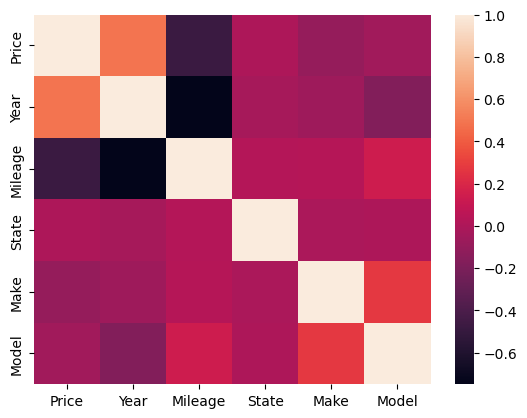

In [19]:
sns.heatmap(data.corr())

In [20]:
# Selección de variables numéricas (X)

X = data.drop(['Price'], axis=1)

X['YxM'] = X['Year'] * X['Mileage']
test['YxM'] = test['Year'] * test['Mileage']

# Definición variable de interés binaria (y)
y = data['Price']

In [21]:
X

,Year,Mileage,State,Make,Model,YxM
0,2017,9913,0,0,0,19994521
1,2015,20578,1,1,1,41464670
2,2012,83716,2,2,2,168436592
3,2014,28729,1,3,3,57860206
4,2013,64032,3,0,0,128896416
...,...,...,...,...,...,...
399995,2015,25287,2,23,278,50953305
399996,2015,17677,28,1,103,35619155
399997,2014,66688,13,6,118,134309632
399998,2014,37872,33,8,11,76274208


In [22]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)

In [23]:
print('Datos para Evaluar el microservicio')
print()
for i in range(len(X_test.head(2))):
    for key, item in dic['State'].items():
        if item == df.iloc[i]['State']:
            _state = key
    
    for key, item in dic['Make'].items():
        if item == df.iloc[i]['Make']:
            _make = key
    
    for key, item in dic['Model'].items():
        if item == df.iloc[i]['Model']:
            _model = key
            
    print('Year:', df.iloc[i]['Year'],'Mileage:', df.iloc[i]['Mileage'],'State:',_state,'Make:',_make,'Model:',_model,'Price:',y_test[i])
   

Datos para Evaluar el microservicio

Year: 2017 Mileage: 9913 State:  FL Make: Jeep Model: Wrangler Price: 34995
Year: 2015 Mileage: 20578 State:  OH Make: Chevrolet Model: Tahoe4WD Price: 37895


In [24]:
models_scores = [] # To store model scores

def rmse(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return mean_squared_error(y_test, y_pred, squared= False) # squared= False > returns Root Mean Square Error                  

In [25]:
X_train

,Year,Mileage,State,Make,Model,YxM
20133,2011,96347,32,1,45,193753817
130425,2016,20508,7,13,195,41344128
330730,2007,72058,29,4,251,144620406
152231,2014,53331,7,14,237,107408634
351009,2016,31843,1,10,339,64195488
...,...,...,...,...,...,...
325559,2011,32132,13,16,426,64617452
327802,2010,75160,33,7,48,151071600
365240,2008,155355,16,1,45,311952840
301086,2013,68879,23,19,176,138653427


### Linear Regression

In [26]:
linear_regression = make_pipeline(LinearRegression())
score = rmse(linear_regression)

models_scores.append(['LinearRegression', score])
print(f'LinearRegression Score= {score}')

LinearRegression Score= 7793.509273640685


### Lasso

In [27]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state= random_state))

score = rmse(lasso)
models_scores.append(['Lasso', score])
print(f'Lasso Score= {score}')

Lasso Score= 7829.7230047622215


### Elastic Net

In [28]:
elastic_net = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio= .9, random_state= random_state))

score = rmse(elastic_net)
models_scores.append(['ElasticNet', score])
print(f'ElasticNet Score= {score}')

ElasticNet Score= 7829.712812826326


## Calibración de Hiperparámetros

### XGBoost

In [29]:
# # Instalación XGBoost: conda install -c conda-forge xgboost
# from xgboost import XGBRegressor
# # Grid de hiperparámetros evaluados
# # ==============================================================================
# param_grid = {'max_depth'        : [None, 1, 3, 5, 10, 20],
#               'subsample'        : [0.5, 1],
#               'learning_rate'    : [0.001, 0.01, 0.1],
#               'booster'          : ['gbtree']
#              }


# # Crear conjunto de validación
# # ==============================================================================
# np.random.seed(123)
# idx_validacion = np.random.choice(
#                     X_train.shape[0],
#                     size= int(X_train.shape[0]*0.1),
#                     replace=False
#                  )

# X_val = X_train.iloc[idx_validacion, :].copy()
# y_val = y_train.iloc[idx_validacion].copy()

# X_train_grid = X_train.reset_index(drop = True).drop(idx_validacion, axis = 0).copy()
# y_train_grid = y_train.reset_index(drop = True).drop(idx_validacion, axis = 0).copy()

# # XGBoost necesita pasar los paramétros específicos del entrenamiento al llamar
# # al método .fit()
# fit_params = {"early_stopping_rounds" : 5, 
#               "eval_metric"           : "rmse", 
#               "eval_set"              : [(X_val, y_val)],
#               "verbose"               : 0
#              }

# # Búsqueda por grid search con validación cruzada
# # ==============================================================================
# grid = GridSearchCV(
#         estimator  = XGBRegressor(
#                         n_estimators = 1000,
#                         random_state = 123
#                     ),
#         param_grid = param_grid,
#         scoring    = 'neg_root_mean_squared_error',
#         n_jobs     = multiprocessing.cpu_count() - 1,
#         cv         = RepeatedKFold(n_splits=3, n_repeats=1, random_state=123), 
#         refit      = True,
#         verbose    = 0,
#         return_train_score = True
#        )

# grid.fit(X = X_train_grid, y = y_train_grid, **fit_params)

# # Resultados
# # ==============================================================================
# resultados = pd.DataFrame(grid.cv_results_)
# resultados.filter(regex = '(param.*|mean_t|std_t)') \
#     .drop(columns = 'params') \
#     .sort_values('mean_test_score', ascending = False) \
#     .head(4)

In [30]:
# # Mejores hiperparámetros por validación cruzada
# # ==============================================================================
# print("----------------------------------------")
# print("Mejores hiperparámetros encontrados (cv)")
# print("----------------------------------------")
# print(grid.best_params_, ":", grid.best_score_, grid.scoring)

# # Número de árboles del modelo final (early stopping)
# # ==============================================================================
# n_arboles_incluidos = len(grid.best_estimator_.get_booster().get_dump())
# print(f"Número de árboles incluidos en el modelo: {n_arboles_incluidos}")

### Calibracion Gradient Boosting

In [31]:
# # Grid de hiperparámetros evaluados
# # ==============================================================================
# param_grid = {'max_features'  : ['auto', 'sqrt', 'log2'],
#               'max_depth'     : [None, 1, 3, 5, 10, 20],
#               'subsample'     : [0.5, 1],
#               'learning_rate' : [0.001, 0.01, 0.1]
#              }

# # Búsqueda por grid search con validación cruzada
# # ==============================================================================
# grid = GridSearchCV(
#         estimator  = GradientBoostingRegressor(
#                         n_estimators        = 1000, 
#                         random_state        = 123,
#                         # Activación de la parada temprana
#                         validation_fraction = 0.1,
#                         n_iter_no_change    = 5,
#                         tol                 = 0.0001
#                     ),
#         param_grid = param_grid,
#         scoring    = 'neg_root_mean_squared_error',
#         n_jobs     = multiprocessing.cpu_count() - 1,
#         cv         = RepeatedKFold(n_splits=3, n_repeats=1, random_state=123), 
#         refit      = True,
#         verbose    = 0,
#         return_train_score = True
#        )

# grid.fit(X = X_train, y = y_train)

# # Resultados
# # ==============================================================================
# resultados = pd.DataFrame(grid.cv_results_)
# resultados.filter(regex = '(param.*|mean_t|std_t)') \
#     .drop(columns = 'params') \
#     .sort_values('mean_test_score', ascending = False) \
#     .head(4)

In [32]:
# # Mejores hiperparámetros por validación cruzada
# # ==============================================================================
# print("----------------------------------------")
# print("Mejores hiperparámetros encontrados (cv)")
# print("----------------------------------------")
# print(grid.best_params_, ":", grid.best_score_, grid.scoring)

In [33]:
# # Número de árboles del modelo final (early stopping)
# # ==============================================================================
# print(f"Número de árboles del modelo: {grid.best_estimator_.n_estimators_}")

### Gradient Boosting

In [34]:
gradient_boosting_regressor= GradientBoostingRegressor(n_estimators=260, learning_rate=0.1,
                                   max_depth=10, max_features='auto', subsample = 1)

score = rmse(gradient_boosting_regressor)
models_scores.append(['GradientBoostingRegressor', score])
print(f'GradientBoostingRegressor Score= {score}')

GradientBoostingRegressor Score= 2938.2513219444504


### XGB Regressor

In [35]:
xgb_regressor= xgb.XGBRegressor(learning_rate=0.1, max_depth=10, 
                              n_estimators=248, verbosity=0, subsample = 1, random_state = random_state)

score = rmse(xgb_regressor)
models_scores.append(['XGBRegressor', score])
print(f'XGBRegressor Score= {score}')

XGBRegressor Score= 2938.3598559525244


In [36]:
estimators = [ ('GradientBoostingRegressor', gradient_boosting_regressor),('xgb_regressor', xgb_regressor) ]

stack = StackingRegressor(estimators=estimators, final_estimator= linear_regression, cv= 5, n_jobs= n_jobs, passthrough = True)

stack.fit(X_train, y_train)

pred = stack.predict(X_test)

rmse_val = mean_squared_error(y_test, pred, squared= False) # squared= False > returns Root Mean Square Error    
models_scores.append(['Stacking', rmse_val])
print(f'rmse= {rmse_val}')

rmse= 2918.350206019909


In [37]:
# Predicción del conjunto de test - acá se genera un número aleatorio como ejemplo
y_pred_test = stack.predict(test)
y_pred = pd.DataFrame(y_pred_test, index=dataTesting.index, columns=['Price'])
y_pred_test

array([20710.67415778, 36695.26402058, 22105.15825843, ...,
       23272.8125742 , 16906.54237861, 20833.84973089])

In [38]:
# Guardar predicciones en formato exigido en la competencia de kaggle
y_pred.to_csv('test_submission.csv', index_label='ID')
y_pred.head()

,Price
ID,
0,20710.674158
1,36695.264021
2,22105.158258
3,7978.133124
4,30699.565725


## Microservicios

In [39]:
# Exportar modelo a archivo binario .pkl
joblib.dump(stack, 'C:/Users/ElkinDavidPeñaRuiz/OneDrive - CARBOMAX DE COLOMBIA S.A.S/PERSONALES/MIAD/CICLO 4/Machine Learning y PLN/MIAD_UNIANDES/model_deployment/car_price_reg.pkl', compress=3)

['C:/Users/ElkinDavidPeñaRuiz/OneDrive - CARBOMAX DE COLOMBIA S.A.S/PERSONALES/MIAD/CICLO 4/Machine Learning y PLN/MIAD_UNIANDES/model_deployment/car_price_reg.pkl']

In [40]:
# Importar modelo y predicción
from model_deployment.model_dep import predict

# Predicción
predict(2017,9913,'FL','Jeep','Wrangler')

array([36794.87034558])

# Disponibilizar modelo con Flask

In [41]:
# Importación librerías
from flask import Flask
from flask_restx import Api, Resource, fields

In [42]:
# Definición aplicación Flask
app = Flask(__name__)

# Definición API Flask
api = Api(
    app, 
    version='1.0', 
    title='Car Price Prediction API',
    description='Car Price Prediction API')

ns = api.namespace('predict', 
     description='Car Price Regression')

# Definición argumentos o parámetros de la API
parser = api.parser()

parser.add_argument(
    'YEAR', 
    type=int, 
    required=True, 
    help='Year', 
    location='args')

parser.add_argument(
    'MILEAGE', 
    type=int, 
    required=True, 
    help='Mileage', 
    location='args')

parser.add_argument(
    'STATE', 
    type=str, 
    required=True, 
    help='State', 
    location='args')

parser.add_argument(
    'MAKE', 
    type=str, 
    required=True, 
    help='Make', 
    location='args')

parser.add_argument(
    'MODEL', 
    type=str, 
    required=True, 
    help='Model', 
    location='args')

resource_fields = api.model('Resource', {
    'result': fields.String,
})

In [43]:
# Definición de la clase para disponibilización
@ns.route('/')
class CarPriceApi(Resource):

    @api.doc(parser=parser)
    @api.marshal_with(resource_fields)
    def get(self):
        args = parser.parse_args()
        
        return {
         "result": predict(args['YEAR'], args['MILEAGE'], args['STATE'], args['MAKE'], args['MODEL'])
        }, 200

In [44]:
# Ejecución de la aplicación que disponibiliza el modelo de manera local en el puerto 5000
app.run(debug=True, use_reloader=False, host='0.0.0.0', port=5000)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on all addresses.
 * Running on http://192.168.1.5:5000/ (Press CTRL+C to quit)
